In [5]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/Datasets/727551_1263738_bundle_archive.zip", 'r') as zip_ref:
    zip_ref.extractall("Heart Failure")

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
data = pd.read_csv("/content/Heart Failure/heart_failure_clinical_records_dataset.csv")

In [9]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Visualizing Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3bf20d6a0>,
      dtype=object)

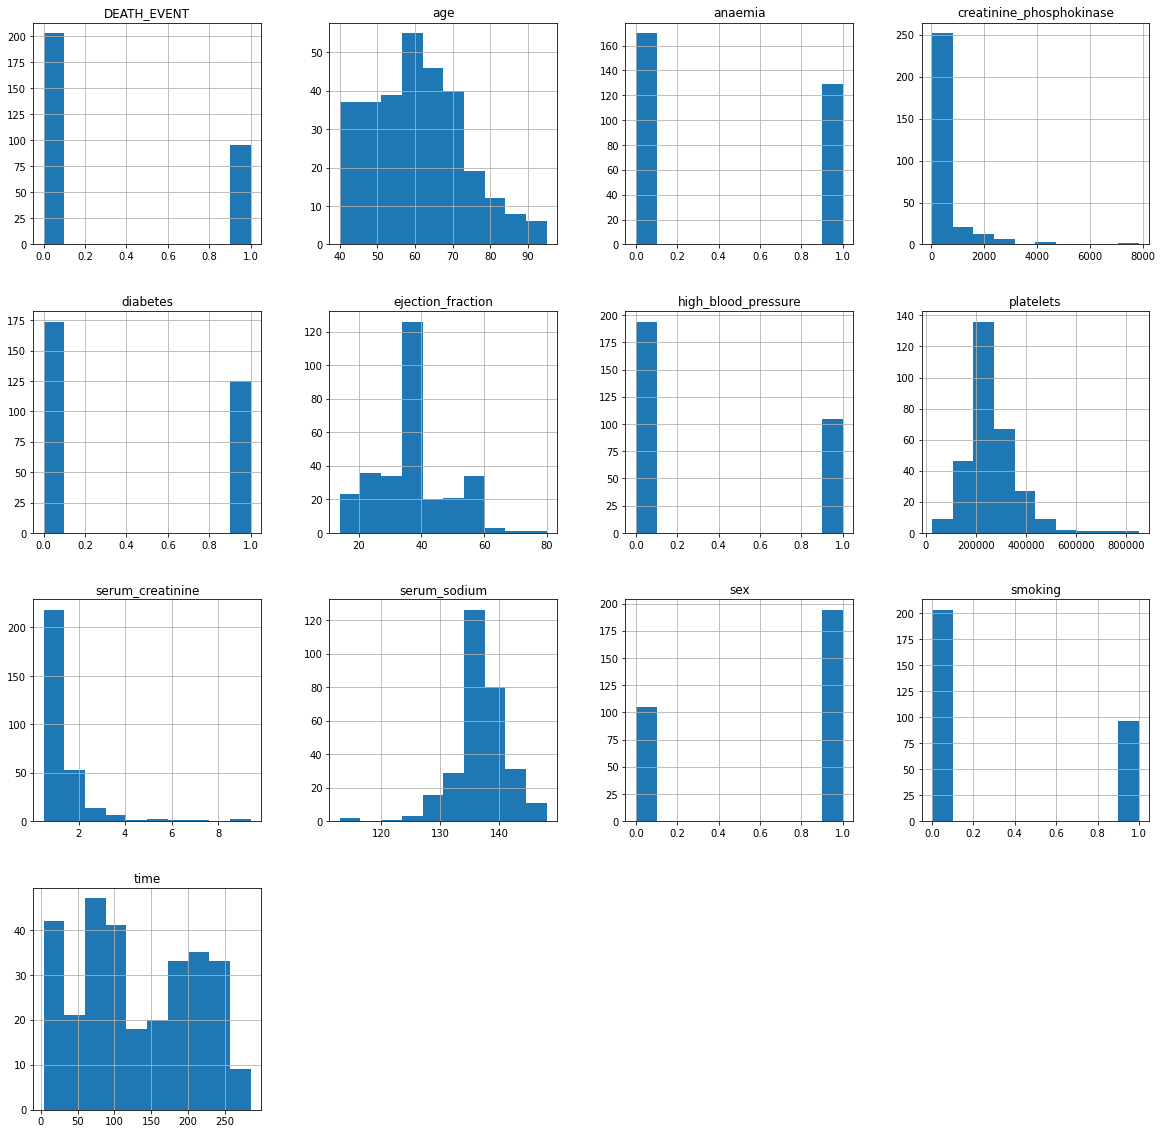

In [13]:
data.hist(figsize = (20,20))

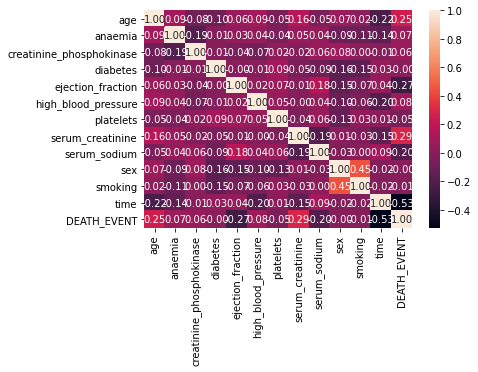

In [14]:
sns.heatmap(data.corr(),annot = True,fmt = ".2f")

In [15]:
from sklearn.model_selection import train_test_split

In [206]:
X = data[['age','diabetes','anaemia','ejection_fraction','time','serum_sodium']]
# y1 = data.iloc[:,11:]
y2 = data.iloc[:,12].values

In [207]:
X

,age,diabetes,anaemia,ejection_fraction,time,serum_sodium
0,75.0,0,0,20,4,130
1,55.0,0,0,38,6,136
2,65.0,0,0,20,7,129
3,50.0,0,1,20,7,137
4,65.0,1,1,20,8,116
...,...,...,...,...,...,...
294,62.0,1,0,38,270,143
295,55.0,0,0,38,271,139
296,45.0,1,0,60,278,138
297,45.0,0,0,38,280,140


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size = 0.2, random_state = 100)

In [209]:
y_train.shape

(239,)

In [210]:
from sklearn.svm import SVC

In [244]:
classifier = SVC(kernel = 'linear')

In [245]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [246]:
y_pred = classifier.predict(X_test)

In [247]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.8

In [248]:
matrix

array([[37,  2],
       [10, 11]])

Decision Tree

In [216]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [217]:
tree = classifier.predict(X_test)

In [218]:
confusion_matrix(y_test,tree)

array([[35,  4],
       [ 9, 12]])

In [219]:
accuracy_score(y_test, tree)

0.7833333333333333

Naive Bayes

In [249]:
from sklearn.naive_bayes import GaussianNB

In [250]:
classifier = GaussianNB()

In [251]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [252]:
y_pred = classifier.predict(X_test)

In [253]:
confusion_matrix(y_test,y_pred)

array([[36,  3],
       [ 8, 13]])

In [254]:

from sklearn.externals import joblib 
joblib.dump(classifier, 'model.sav') 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.sav']

In [225]:
accuracy_score(y_test, y_pred)

0.8166666666666667

KNN k-nearest neighbour

In [226]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 2)

In [227]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [228]:
y_pred = classifier.predict(X_test)

In [229]:
accuracy_score(y_test,y_pred)

0.7833333333333333

Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
classifier = LogisticRegression()

In [232]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
y_pred = classifier.predict(X_test)

In [234]:
accuracy_score(y_test, y_pred)

0.7666666666666667

In [235]:
matrix = confusion_matrix(y_test, y_pred)

In [236]:
matrix

array([[36,  3],
       [11, 10]])

Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
clf.fit(X_train, y_train)
ypred=clf.predict(X_test)

In [238]:
clf.score(X_test,y_test)

0.8

In [239]:
accuracy_score(y_test,ypred)

0.8



> Indented block


**Finally making a real-time predictor**

> Indented block



In [255]:
predictor = joblib.load('model.sav')  

In [268]:
Age = int(input("Enter your Age: "))
Anaenemia = int(input("Do you have anaemia (Enter 1 for anaemic and 0 for non-anaemic: "))
Diabetes = int(input("Do you have diabetes (Enter 1 for diabetes and 0 for non-diabetic: "))
Ejection_fraction = int(input("Enter the Percentage of blood leaving the heart at each contraction(ejection_fraction): "))
Time = int(input("Enter your follow up period in days: "))
Serum_sodium = int(input("Enter the level of serum sodium in blood: "))


sample = np.asarray([[Age,Diabetes,Anaenemia,Ejection_fraction,Time,Serum_sodium]])
result = predictor.predict(sample)
if result == 1:
  print("\nYou have high risk of heart failure please take care of yourself")
else:
  print("You dont have any risk of heart failure for know.")

Enter your Age: 30
Do you have anaemia (Enter 1 for anaemic and 0 for non-anaemic: 1
Do you have diabetes (Enter 1 for diabetes and 0 for non-diabetic: 1
Enter the Percentage of blood leaving the heart at each contraction(ejection_fraction): 90
Enter your follow up period in days: 30
Enter the level of serum sodium in blood: 115
You have high risk of heart failure please take care of yourself
